In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#this is to define the state space 
v_n = 100                     #we are going to divide the velocity state space into 1500 discrete points
v_max = 0.07
v_min = -0.07
velocities = np.linspace (v_min , v_max , v_n)

p_n = 100
p_max = 0.6
p_min = -1.2
positions = np.linspace (p_min , p_max , p_n)
gamma = 0.9
reward = -1

In [3]:
def give_index (pos , vel):
    #this function takes the pos and the vel and then return the correspoding index of the state
    #in the state space
    v_div = (v_max - v_min) / (v_n - 1)
    y =  (vel - v_min) / v_div
    
    p_div = (p_max - p_min) / (p_n - 1)
    x = (pos - p_min) / p_div
    
    return (int(x) , int(y))

In [4]:
def mountain_car_simulation (pos , vel , action):
    new_velocity = vel + (action * 0.001) + math.cos (3 * pos ) * (-0.0025)
    #applying the boundary condition

    
    new_velocity = min (max (v_min , new_velocity) , v_max)
    new_position = pos + new_velocity
    
    
    #apply boundary
    new_position = min (max (p_min , new_position) , p_max )

    if (new_position <= p_min):
        new_velocity = 0
    #print("oldVel = ", vel, "oldPos = ", pos, "newVel = ", new_velocity, "newPos = ", new_position)    
    return new_position , new_velocity
    

In [5]:
mountain_car_simulation (0.6 , +0.0, +1)

(0.6, 0.0015680052367327171)

In [6]:
def value_iteration (state_values):
    #this function takes the state values (initial)
    #and then use the value iteration to return the actual value function of the states
    
    #in the state values rows represent the position and the columns represent the velocity
    action_space = np.zeros ((p_n , v_n))
    
    threshold = 1000
    epsilon = 0.01
    threshold_list = []
    
    for itr in range(1500):
        
        if (itr % 50 == 0):
            print ("number of iterations : " , itr)
        #print (threshold)
        #compute the value function for the first sweep
        threshold = -math.inf
        
        for row in range(p_n):
            for col in range(v_n):
                
                current_vel = velocities[col]
                current_pos = positions[row]
                
                optimal_value = -math.inf
                temp_value = -1
                for action in [-1 , 0 , 1]:
                    
                    new_position , new_velocity = mountain_car_simulation(current_pos, current_vel , action)
                    x , y = give_index (new_position , new_velocity)
                    
                    temp_value =state_values[x][y]
                    if (new_position < 0.6):
                        temp_value += -1
                    
                        
                    if (temp_value > optimal_value):
                        optimal_value = temp_value
                        action_space[row][col] = action
                        
                threshold = max (threshold ,  abs (optimal_value - state_values[row][col]))

                state_values[row][col] = optimal_value
        threshold_list.append(threshold)
    
    return (np.copy (state_values) , np.copy (threshold_list) , action_space)
                    

In [7]:
#this takes the action space and then return the correspoding policy
def policy_evaluation (action_space):
    value_space = np.zeros ((p_n , v_n))
    for itr in range (10):
        
        if (itr % 10 == 0):
            print (itr)
        for row in range (p_n):
            for col in range(v_n):
                current_pos = positions[row]
                current_vel = velocities[col]
                action = action_space[row][col]
                
                new_pos , new_vel = mountain_car_simulation (current_pos , current_vel , action)
                x , y = give_index(new_pos , new_vel)
                
                temp_value = value_space[x][y]
                if (new_pos < 0.6):
                    temp_value += -1
                    
                value_space[row][col] = temp_value
    
    return np.copy (value_space)

In [8]:
def update_policy (value_space):
    policy = np.zeros ((p_n , v_n))
    
    for row in range(p_n):
        for col in range(v_n):
            optimal_values= np.zeros((0 , 1))
            
            current_pos = positions[row]
            current_vel = velocities[col]
            
            
            for action in [-1 , 0 , 1]:
                new_pos , new_vel = mountain_car_simulation (current_pos , current_vel , action)
                x , y = give_index (new_pos , new_vel)
                temp_value = value_space[x][y]
                
                if (new_pos < 0.6):
                    temp_value += -1
                
                optimal_values = np.vstack([optimal_values , np.array([temp_value])])
            
            
            policy[row][col] = np.argmax (optimal_values)
            
    return np.copy (policy)

In [9]:
def policy_iteration ():
    policy = np.zeros ((p_n , v_n))
    value = np.zeros ((p_n , v_n))
    
    for itr in range(200):
        print ("Number of iterations : " , itr)
        value = policy_evaluation(policy)
        policy = update_policy(value)
        
    return (value , policy)
        

In [10]:
state_value = np.zeros ((p_n , v_n))
final_values , threshold_list , action_space= value_iteration(state_value)

number of iterations :  0
number of iterations :  50
number of iterations :  100
number of iterations :  150
number of iterations :  200
number of iterations :  250
number of iterations :  300
number of iterations :  350
number of iterations :  400
number of iterations :  450
number of iterations :  500
number of iterations :  550
number of iterations :  600
number of iterations :  650
number of iterations :  700
number of iterations :  750
number of iterations :  800
number of iterations :  850
number of iterations :  900
number of iterations :  950
number of iterations :  1000
number of iterations :  1050
number of iterations :  1100
number of iterations :  1150
number of iterations :  1200
number of iterations :  1250
number of iterations :  1300
number of iterations :  1350
number of iterations :  1400
number of iterations :  1450


In [11]:
print(action_space)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


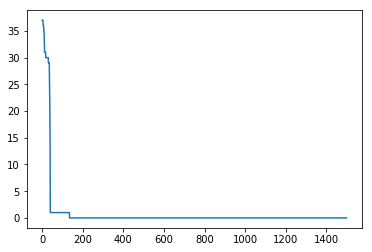

In [12]:
plt.plot (range(len(threshold_list)) , threshold_list)

action_space = return_policy(final_values)

In [13]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
np.savetxt("value.txt" , final_values , fmt = "%0.5f")
np.savetxt("action.txt" , action_space , fmt = "%i")

np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
np.savetxt("value.txt" , final_values , fmt = "%0.5f")

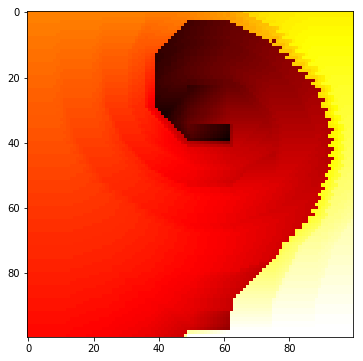

In [14]:
plt.figure(figsize = (8 , 6))
plt.imshow (final_values , cmap = "hot" , interpolation="nearest")

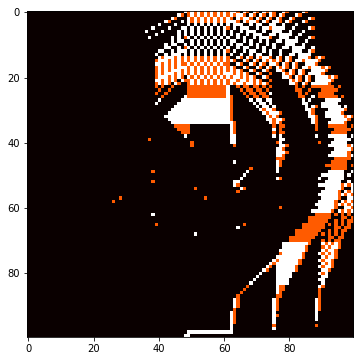

In [15]:
plt.figure(figsize = (8 , 6))
plt.imshow (action_space , cmap = "hot"  )

In [16]:
print (threshold_list[len(threshold_list) - 1])

0.0


In [17]:
value , policy = policy_iteration()

Number of iterations :  0
0
Number of iterations :  1
0
Number of iterations :  2
0
Number of iterations :  3
0
Number of iterations :  4
0
Number of iterations :  5
0
Number of iterations :  6
0
Number of iterations :  7
0
Number of iterations :  8
0
Number of iterations :  9
0
Number of iterations :  10
0
Number of iterations :  11
0
Number of iterations :  12
0
Number of iterations :  13
0
Number of iterations :  14
0
Number of iterations :  15
0
Number of iterations :  16
0
Number of iterations :  17
0
Number of iterations :  18
0
Number of iterations :  19
0
Number of iterations :  20
0
Number of iterations :  21
0
Number of iterations :  22
0
Number of iterations :  23
0
Number of iterations :  24
0
Number of iterations :  25
0
Number of iterations :  26
0
Number of iterations :  27
0
Number of iterations :  28
0
Number of iterations :  29
0
Number of iterations :  30
0
Number of iterations :  31
0
Number of iterations :  32
0
Number of iterations :  33
0
Number of iterations :  

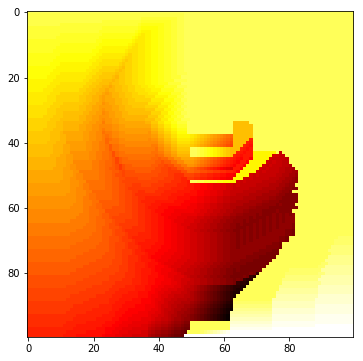

In [18]:
plt.figure(figsize = (8 , 6))
plt.imshow (value , cmap = "hot" , interpolation="nearest")

In [20]:
print(policy)
print(value)

[[ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]
 [ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]
 [ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]
 ...
 [ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]
 [ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]
 [ 0.00000  0.00000  0.00000 ...  0.00000  0.00000  0.00000]]
[[-10.00000 -10.00000 -10.00000 ... -10.00000 -10.00000 -10.00000]
 [-11.00000 -11.00000 -11.00000 ... -10.00000 -10.00000 -10.00000]
 [-11.00000 -11.00000 -11.00000 ... -10.00000 -10.00000 -10.00000]
 ...
 [-35.00000 -35.00000 -35.00000 ...  0.00000  0.00000  0.00000]
 [-35.00000 -35.00000 -35.00000 ...  0.00000  0.00000  0.00000]
 [-35.00000 -35.00000 -35.00000 ...  0.00000  0.00000  0.00000]]
